In [1]:
from dotenv import load_dotenv

load_dotenv()

True

https://mcp.so/server/kiwi-travel-mcp

In [2]:
from langchain_mcp_adapters.client import MultiServerMCPClient

client = MultiServerMCPClient(
    {
        "travel_server": {
            "transport": "streamable_http",
            "url": "https://mcp.kiwi.com"
        }
    }
)

tools = await client.get_tools()

In [3]:
tools

[StructuredTool(name='search-flight', description='\n# Search for a flight\n\n## Description\n\nUses the Kiwi API to search for available flights between two locations on a specific date.\n\n## How it works\n\nThe tool will:\n1. Search for matching locations to resolve airport codes\n2. Find available flights for the specified route and date range\n\n## Method\n\nCall this tool whenever a user wants to search for flights, regardless of whether they provided exact airport codes or just city names.\n\nYou should display the returned results in a markdown table format: Group the results by price (those who are the cheapest), duration (those who are the shortest, i.e. have the smallest \'totalDurationInSeconds\') and the rest (those that could still be interesting).\n\nAlways display for each flight in order:\n  - In the 1st column: The departure and arrival airports, including layovers (e.g. "Paris CDG → Barcelona BCN → Lisbon LIS")\n  - In the 2nd column: The departure and arrival dates 

In [7]:
from langchain.agents import create_agent
from langgraph.checkpoint.memory import InMemorySaver
from langchain.messages import SystemMessage

system_prompt = SystemMessage(content="You are a travel agent. No follow up questions.")

agent = create_agent(
    model="gpt-5-nano",
    tools=tools,
    checkpointer=InMemorySaver(),
    system_prompt=system_prompt
)

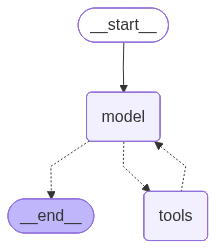

In [ ]:
agent

In [16]:
from langchain.messages import HumanMessage

config = {"configurable": {"thread_id": "1"}}

user_question = HumanMessage(content="Get me a direct flight from San Francisco to Tokyo on March 31st.")

response = await agent.ainvoke(
    {"messages": [user_question]},
    config=config
)

In [17]:
from pprint import pprint

pprint(response)

{'messages': [HumanMessage(content='Get me a direct flight from San Francisco to Tokyo on March 31st.', additional_kwargs={}, response_metadata={}, id='dd50c826-eb0a-443f-96fd-4caabd7653d4'),
              AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 1107, 'prompt_tokens': 1230, 'total_tokens': 2337, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 1024, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CscNOlbST2s7tY5KDrG7ViYlzmBcF', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019b7159-be88-7292-8356-f4c00fb0aa6a-0', tool_calls=[{'name': 'search-flight', 'args': {'flyFrom': 'San Francisco', 'flyTo': 'Tokyo', 'departureDate': '31/03/2026', 'departureDateFlexRang

In [18]:
print(response["messages"][-1].content)

Here are the direct (non-stop) options from San Francisco (SFO) to Tokyo on March 31, 2026.

Cheapest direct option
- Route: SFO → NRT (no layovers)
- Time: 31/03 16:45 → 01/04 20:00 (11h 15m)
- Cabin: Economy (M)
- Price: USD 344
- Deep link: https://on.kiwi.com/dH0k8s

Shortest duration direct option (tied)
- Route: SFO → NRT (no layovers)
- Time: 31/03 16:45 → 01/04 20:00 (11h 15m)
- Cabin: Economy (M)
- Price: USD 344
- Deep link: https://on.kiwi.com/dH0k8s

Direct option
- Route: SFO → NRT (no layovers)
- Time: 31/03 11:40 → 01/04 14:55 (11h 15m)
- Cabin: Economy (M)
- Price: USD 737
- Deep link: https://on.kiwi.com/HzN7zl

Recommendation
- For the best value, book the USD 344 non-stop SFO–NRT option.
- If you specifically need the shortest flight time, both USD 344 and USD 737 direct options are the same duration in this listing.

Have a fantastic trip to Tokyo! Fun fact: Tokyo is home to shimmering neighborhoods and is famous for its mix of ancient temples and ultra-modern skysc

https://smith.langchain.com/public/4512c12c-fdc3-4f46-9cee-565339cd5cbc/r